/var/folders/hq/s994n_rs38zddnwxzys82dc00000gn/T/ipykernel_2719/4077865088.py:37: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xy[:, 0], xy[:, 1], c=color, alpha=0.5)


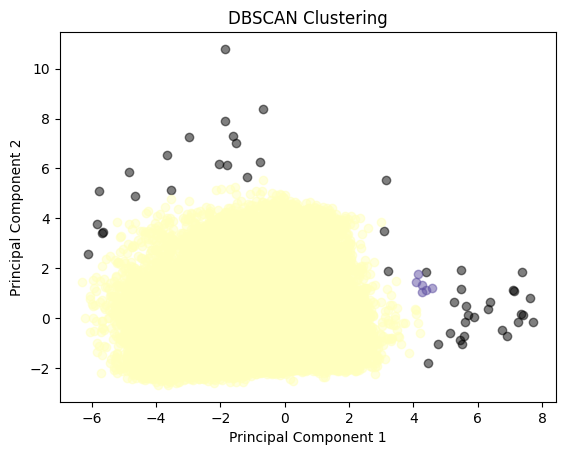

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances

# Load data from CSV file
data = pd.read_csv("Datos/base.csv", sep=';')  # replace with your file name

# Extract features and normalize data
X = data.iloc[:, 1:].values  # assuming the first column is the ID column
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)

# Cluster data using DBSCAN
eps = 0.5  # replace with your desired value
min_samples = 5 # replace with your desired value
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)

# Plot clusters
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for label, color in zip(unique_labels, colors):
    if label == -1:
        # Black used for noise.
        color = 'k'

    class_member_mask = (labels == label)
    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=color, alpha=0.5)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("DBSCAN Clustering")
plt.show()
